In [1]:
import pandas as pd
import numpy as np
import os
import plotly.express as px

import seaborn as sns
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import matplotlib.pyplot as plt


In [2]:
manufacturer_df = pd.read_csv("../Resources/manufacturer_breakdown.csv")
manufacturer_df = manufacturer_df[['location','date','CanSino','Johnson&Johnson','Moderna','Oxford/AstraZeneca','Pfizer/BioNTech','Sinopharm/Beijing','Sinovac','Sputnik V']]

In [3]:
manufacturer_df.head(5)

location        date  CanSino  Johnson&Johnson  Moderna  Oxford/AstraZeneca  \
0  Austria  2021-01-08      NaN              0.0      0.0                 0.0   
1  Austria  2021-01-15      NaN              0.0     87.0                 0.0   
2  Austria  2021-01-22      NaN              0.0    304.0                 1.0   
3  Austria  2021-01-29      NaN              0.0   4225.0                 2.0   
4  Austria  2021-02-05      NaN              0.0   5922.0                 6.0   

   Pfizer/BioNTech  Sinopharm/Beijing  Sinovac  Sputnik V  
0          31099.0                NaN      NaN        NaN  
1         115801.0                NaN      NaN        NaN  
2         212899.0                NaN      NaN        NaN  
3         257621.0                NaN      NaN        NaN  
4         353111.0                NaN      NaN        NaN

In [4]:
manufacturer_df.fillna(float(0))

location        date  CanSino  Johnson&Johnson  Moderna  \
0     Austria  2021-01-08      0.0              0.0      0.0   
1     Austria  2021-01-15      0.0              0.0     87.0   
2     Austria  2021-01-22      0.0              0.0    304.0   
3     Austria  2021-01-29      0.0              0.0   4225.0   
4     Austria  2021-02-05      0.0              0.0   5922.0   
...       ...         ...      ...              ...      ...   
4962  Uruguay  2021-09-26      0.0              0.0      0.0   
4963  Uruguay  2021-09-27      0.0              0.0      0.0   
4964  Uruguay  2021-09-28      0.0              0.0      0.0   
4965  Uruguay  2021-09-29      0.0              0.0      0.0   
4966  Uruguay  2021-09-30      0.0              0.0      0.0   

      Oxford/AstraZeneca  Pfizer/BioNTech  Sinopharm/Beijing    Sinovac  \
0                    0.0          31099.0                0.0        0.0   
1                    0.0         115801.0                0.0        0.0   
2                    1.0         212899.0                0.0        0.0   
3                    2.0         257621.0                0.0        0.0   
4                    6.0         353111.0                0.0        0.0   
...                  ...              ...                ...        ...   
4962             86603.0        1958109.0                0.0  3245853.0   
4963             86603.0        1964999.0                0.0  3245876.0   
4964             86603.0        1967911.0                0.0  3245896.0   
4965             86603.0        1969968.0                0.0  3245907.0   
4966             86603.0        1972562.0                0.0  3245928.0   

      Sputnik V  
0           0.0  
1           0.0  
2           0.0  
3           0.0  
4           0.0  
...         ...  
4962        0.0  
4963        0.0  
4964        0.0  
4965        0.0  
4966        0.0  

[4967 rows x 10 columns]

In [5]:
cumulative_manufacturer_df = manufacturer_df.iloc[0:0]
cumulative_manufacturer_df.drop(columns='date')
manufacturer_df_nodate = manufacturer_df.drop(columns='date')

In [6]:


print(manufacturer_df_nodate[(manufacturer_df_nodate["location"]=='Austria') & (manufacturer_df_nodate["location"]==float(manufacturer_df_nodate[manufacturer_df_nodate["location"]=='Austria']["CanSino"].sum()))])

#manufacturer_df['location'].unique()
#for country in manufacturer_df["location"].unique():
    #temp = manufacturer_df[(manufacturer_df["location"]==country) & (manufacturer_df["CanSino"]==float(manufacturer_df[manufacturer_df["location"]==country]["CanSino"].max())) & (manufacturer_df["Johnson&Johnson"]==float(manufacturer_df[manufacturer_df["location"]==country]["Johnson&Johnson"].max())) & (manufacturer_df["Moderna"]==float(manufacturer_df[manufacturer_df["location"]==country]["Moderna"].max())) &	 (manufacturer_df["Oxford/AstraZeneca"]==float(manufacturer_df[manufacturer_df["location"]==country]["Oxford/AstraZeneca"].max())) & (manufacturer_df["Pfizer/BioNTech"]==float(manufacturer_df[manufacturer_df["location"]==country]["Pfizer/BioNTech"].max())) & (manufacturer_df["Sinopharm/Beijing"]==float(manufacturer_df[manufacturer_df["location"]==country]["Sinopharm/Beijing"].max())) & (manufacturer_df["Sinovac"]==float(manufacturer_df[manufacturer_df["location"]==country]["Sinovac"].max())) &  (manufacturer_df["Sputnik V"]==float(manufacturer_df[manufacturer_df["location"]==country]["Sputnik V"].max()))]
    #cumulative_manufacturer_df = cumulative_manufacturer_df.append(temp)        

#cumulative_manufacturer_df  
#Debug attempt    
#for country in manufacturer_df['location'].unique():
 #   temp = manufacturer_df[(manufacturer_df["location"]==country) & (manufacturer_df["CanSino"]==float(manufacturer_df[manufacturer_df["location"]==country]["CanSino"].max())) & (manufacturer_df["Johnson&Johnson"]==float(manufacturer_df[manufacturer_df["location"]==country]["Johnson&Johnson"].max())) & (manufacturer_df["Moderna"]==float(manufacturer_df[manufacturer_df["location"]==country]["Moderna"].max())) &	 (manufacturer_df["Oxford/AstraZeneca"]==float(manufacturer_df[manufacturer_df["location"]==country]["Oxford/AstraZeneca"].max())) & (manufacturer_df["Pfizer/BioNTech"]==float(manufacturer_df[manufacturer_df["location"]==country]["Pfizer/BioNTech"].max())) & (manufacturer_df["Sinopharm/Beijing"]==float(manufacturer_df[manufacturer_df["location"]==country]["Sinopharm/Beijing"].max())) & (manufacturer_df["Sinovac"]==float(manufacturer_df[manufacturer_df["location"]==country]["Sinovac"].max())) &  (manufacturer_df["Sputnik V"]==float(manufacturer_df[manufacturer_df["location"]==country]["Sputnik V"].max()))]
 #   print (temp)

Empty DataFrame
Columns: [location, CanSino, Johnson&Johnson, Moderna, Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm/Beijing, Sinovac, Sputnik V]
Index: []


In [7]:

#cumulative_manufacturer_df.head(30)
manufacturer_df.rename(columns={'location':'country'})
manufacturer_df.head()


location        date  CanSino  Johnson&Johnson  Moderna  Oxford/AstraZeneca  \
0  Austria  2021-01-08      NaN              0.0      0.0                 0.0   
1  Austria  2021-01-15      NaN              0.0     87.0                 0.0   
2  Austria  2021-01-22      NaN              0.0    304.0                 1.0   
3  Austria  2021-01-29      NaN              0.0   4225.0                 2.0   
4  Austria  2021-02-05      NaN              0.0   5922.0                 6.0   

   Pfizer/BioNTech  Sinopharm/Beijing  Sinovac  Sputnik V  
0          31099.0                NaN      NaN        NaN  
1         115801.0                NaN      NaN        NaN  
2         212899.0                NaN      NaN        NaN  
3         257621.0                NaN      NaN        NaN  
4         353111.0                NaN      NaN        NaN

In [22]:
manufacturer_df_nodate.head(100)
manufacturer_df_nodate.fillna(0.0)

location  CanSino  Johnson&Johnson  Moderna  Oxford/AstraZeneca  \
0     Austria      0.0              0.0      0.0                 0.0   
1     Austria      0.0              0.0     87.0                 0.0   
2     Austria      0.0              0.0    304.0                 1.0   
3     Austria      0.0              0.0   4225.0                 2.0   
4     Austria      0.0              0.0   5922.0                 6.0   
...       ...      ...              ...      ...                 ...   
4962  Uruguay      0.0              0.0      0.0             86603.0   
4963  Uruguay      0.0              0.0      0.0             86603.0   
4964  Uruguay      0.0              0.0      0.0             86603.0   
4965  Uruguay      0.0              0.0      0.0             86603.0   
4966  Uruguay      0.0              0.0      0.0             86603.0   

      Pfizer/BioNTech  Sinopharm/Beijing    Sinovac  Sputnik V  
0             31099.0                0.0        0.0        0.0  
1            115801.0                0.0        0.0        0.0  
2            212899.0                0.0        0.0        0.0  
3            257621.0                0.0        0.0        0.0  
4            353111.0                0.0        0.0        0.0  
...               ...                ...        ...        ...  
4962        1958109.0                0.0  3245853.0        0.0  
4963        1964999.0                0.0  3245876.0        0.0  
4964        1967911.0                0.0  3245896.0        0.0  
4965        1969968.0                0.0  3245907.0        0.0  
4966        1972562.0                0.0  3245928.0        0.0  

[4967 rows x 9 columns]

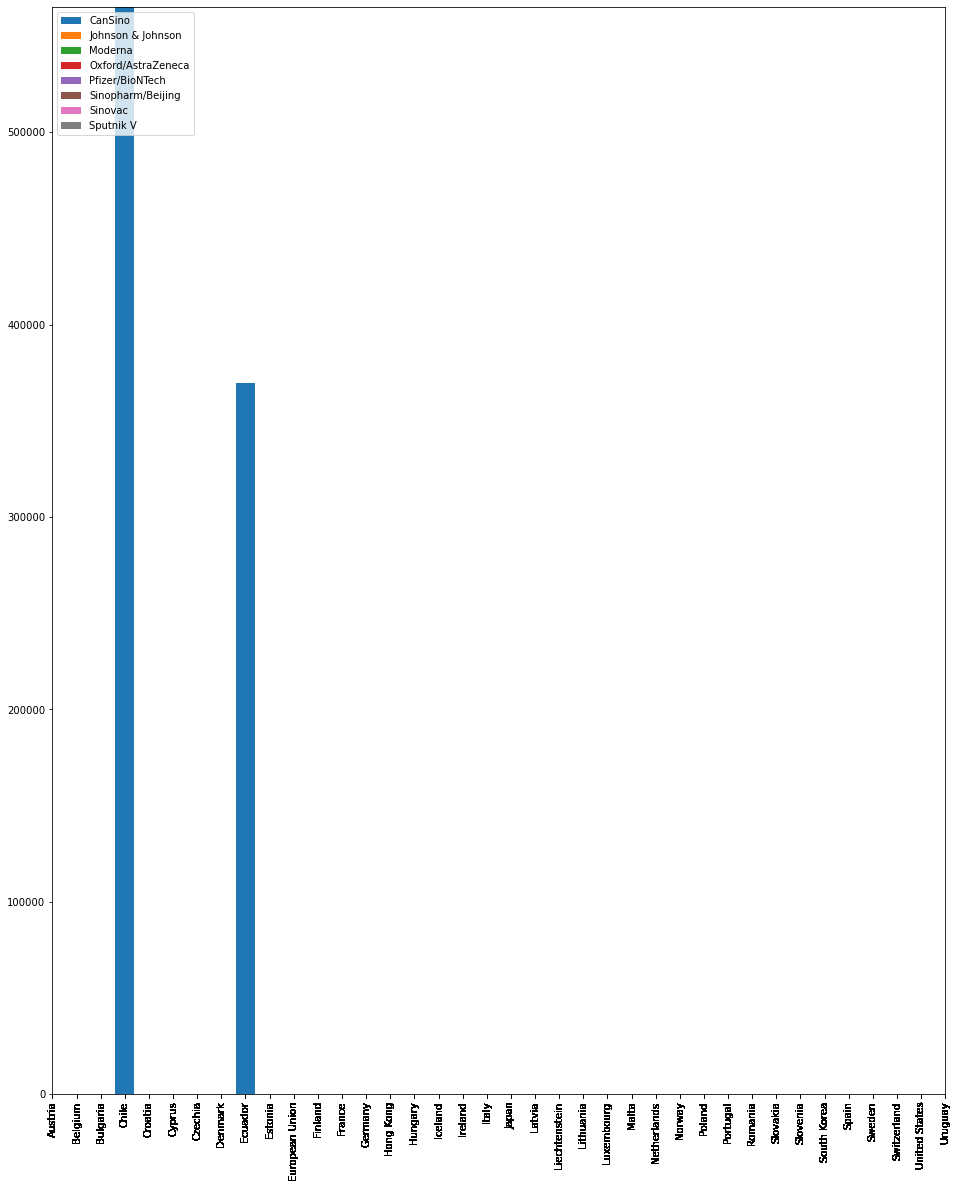

In [39]:
#Stacked bar chart of country totals by vendor
fig,ax = plt.subplots(figsize=(16,20))

ax.bar(manufacturer_df["location"],manufacturer_df["CanSino"],label="CanSino")
ax.bar(manufacturer_df["location"],manufacturer_df["Johnson&Johnson"],bottom=manufacturer_df_nodate["CanSino"],label="Johnson & Johnson")
ax.bar(manufacturer_df["location"],manufacturer_df["Moderna"],bottom=manufacturer_df_nodate["Johnson&Johnson"]+manufacturer_df_nodate["CanSino"],label="Moderna")
ax.bar(manufacturer_df["location"],manufacturer_df["Oxford/AstraZeneca"],bottom=manufacturer_df_nodate["Moderna"]+manufacturer_df_nodate["Johnson&Johnson"]+manufacturer_df_nodate["CanSino"],label="Oxford/AstraZeneca")
ax.bar(manufacturer_df["location"],manufacturer_df["Pfizer/BioNTech"],bottom=manufacturer_df_nodate["Oxford/AstraZeneca"]+manufacturer_df_nodate["Moderna"]+manufacturer_df_nodate["Johnson&Johnson"]+manufacturer_df_nodate["CanSino"],label="Pfizer/BioNTech")
ax.bar(manufacturer_df["location"],manufacturer_df["Sinopharm/Beijing"],bottom=manufacturer_df_nodate["Pfizer/BioNTech"]+manufacturer_df_nodate["Oxford/AstraZeneca"]+manufacturer_df_nodate["Moderna"]+manufacturer_df_nodate["Johnson&Johnson"]+manufacturer_df_nodate["CanSino"],label="Sinopharm/Beijing")
ax.bar(manufacturer_df["location"],manufacturer_df["Sinovac"],bottom=manufacturer_df_nodate["Sinopharm/Beijing"]+manufacturer_df_nodate["Pfizer/BioNTech"]+manufacturer_df_nodate["Oxford/AstraZeneca"]+manufacturer_df_nodate["Moderna"]+manufacturer_df_nodate["Johnson&Johnson"]+manufacturer_df_nodate["CanSino"],label="Sinovac")
ax.bar(manufacturer_df["location"],manufacturer_df["Sputnik V"],bottom=manufacturer_df_nodate["Sinovac"]+manufacturer_df_nodate["Sinopharm/Beijing"]+manufacturer_df_nodate["Pfizer/BioNTech"]+manufacturer_df_nodate["Oxford/AstraZeneca"]+manufacturer_df_nodate["Moderna"]+manufacturer_df_nodate["Johnson&Johnson"]+manufacturer_df_nodate["CanSino"],label="Sputnik V")

ax.legend(loc='upper left')
ax.set_xticks(manufacturer_df_nodate["location"])
plt.xticks(rotation=90)
plt.ylabel='Total Vaccinations'
plt.xlabel='Country'

No handles with labels found to put in legend.


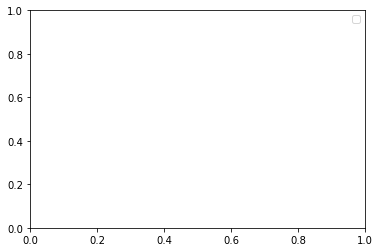

In [16]:
plt.legend()

TypeError: list indices must be integers or slices, not list

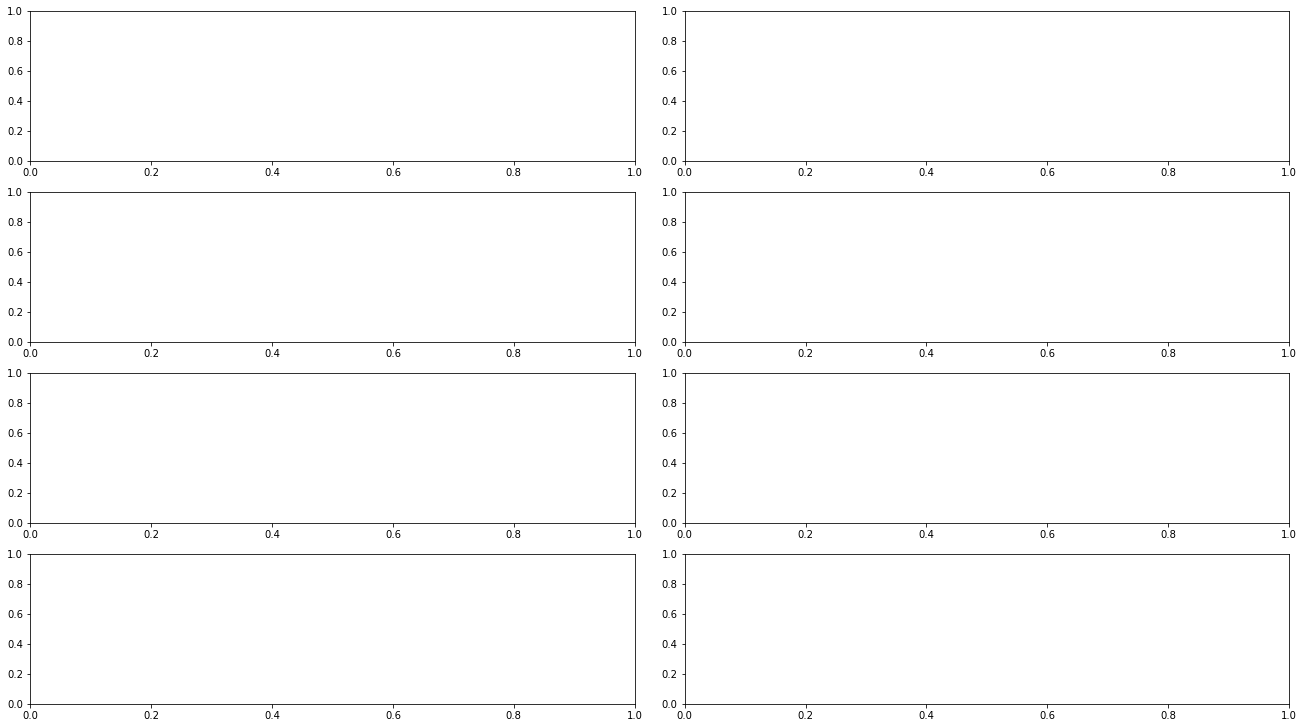

In [107]:
fig,axs = plt.subplots(nrows=4, ncols=2,figsize=(18,10),constrained_layout=True) 

x1 = manufacturer_df["date"]
y1 = manufacturer_df["CanSino"]
y2 = manufacturer_df["Johnson&Johnson"]
y3 = manufacturer_df["Moderna"]
y4 = manufacturer_df["Oxford/AstraZeneca"]
y5 = manufacturer_df["Pfizer/BioNTech"]
y6 = manufacturer_df["Sinopharm/Beijing"]
y7 = manufacturer_df["Sinovac"]
y8 = manufacturer_df["Sputnik V"]

colordict = ['red','green','blue','purple','cyan','orange','yellow','black','pink','red','green','blue','purple','cyan','orange','yellow','black','pink','red','green','blue','purple','cyan','orange','yellow','black','pink']
for country in manufacturer_df['location']:
    nextcolor = colordict[i]
    axs[0,0].plot(x1,y1,color=nextcolor)
    i= i+1
axs[0,0].plot(x1,y1)
axs[0,1].plot(x1,y2)


In [80]:
#Make eight mini-line graphs to show vaccines by vendor
#print(len(manufacturer_df['location'].unique()))
by_vendor_line = make_subplots(rows=4,cols=2)
jj =px.line(manufacturer_df, x='date', y= 'Johnson&Johnson', color ='location', title = 'Johnson&Johnson Vaccination Count across 38 countries')
jj.show()

In [82]:
cansino =px.line(manufacturer_df, x='date', y= 'CanSino', color ='location', title = 'CanSino Vaccination Count across 38 countries')
cansino.show()

In [83]:
oxford =px.line(manufacturer_df, x='date', y= 'Oxford/AstraZeneca', color ='location', title = 'Oxford/AstraZeneca Vaccination Count across 38 countries')
oxford.show()

In [85]:
moderna =px.line(manufacturer_df, x='date', y= 'Moderna', color ='location', title = 'Moderna Vaccination Count across 38 countries')
moderna.show()

In [88]:
pfizer =px.line(manufacturer_df, x='date', y= 'Pfizer/BioNTech', color ='location', title = 'Pfizer/BioNTech Vaccination Count across 38 countries')
pfizer.show()

In [91]:
sinopharm =px.line(manufacturer_df, x='date', y= 'Sinopharm/Beijing', color ='location', title = 'Sinopharm/Beijing Vaccination Count across 38 countries')
sinopharm.show()


In [97]:
sinovac =px.line(manufacturer_df, x='date', y= 'Sinovac', color ='location', title = 'Sinovac Vaccination Count across 38 countries')
sinovac.show()

AttributeError: 'Figure' object has no attribute 'legend'

In [92]:
sputnik =px.line(manufacturer_df, x='date', y= 'Sputnik V', color ='location', title = 'Sputnik V Vaccination Count across 38 countries')
sputnik.show()

In [6]:

Vaccines_df.head()

Unnamed: 0 location        date  CanSino  Johnson&Johnson  Moderna  \
0           0  Austria  2021-01-08      NaN              0.0      0.0   
1           1  Austria  2021-01-15      NaN              0.0     87.0   
2           2  Austria  2021-01-22      NaN              0.0    304.0   
3           3  Austria  2021-01-29      NaN              0.0   4225.0   
4           4  Austria  2021-02-05      NaN              0.0   5922.0   

   Oxford/AstraZeneca  Pfizer/BioNTech  Sinopharm/Beijing  Sinovac  Sputnik V  
0                 0.0          31099.0                NaN      NaN        NaN  
1                 0.0         115801.0                NaN      NaN        NaN  
2                 1.0         212899.0                NaN      NaN        NaN  
3                 2.0         257621.0                NaN      NaN        NaN  
4                 6.0         353111.0                NaN      NaN        NaN

In [4]:
#stacked bar chart of countries and vaccines to show which are most used per nation

Vaccines_df= pd.read_csv('../Resources/manufacturer_breakdown_clean.csv')
Vaccines_df.drop(['Unnamed: 0'],axis=1).head()


location        date  CanSino  Johnson&Johnson  Moderna  Oxford/AstraZeneca  \
0  Austria  2021-01-08      NaN              0.0      0.0                 0.0   
1  Austria  2021-01-15      NaN              0.0     87.0                 0.0   
2  Austria  2021-01-22      NaN              0.0    304.0                 1.0   
3  Austria  2021-01-29      NaN              0.0   4225.0                 2.0   
4  Austria  2021-02-05      NaN              0.0   5922.0                 6.0   

   Pfizer/BioNTech  Sinopharm/Beijing  Sinovac  Sputnik V  
0          31099.0                NaN      NaN        NaN  
1         115801.0                NaN      NaN        NaN  
2         212899.0                NaN      NaN        NaN  
3         257621.0                NaN      NaN        NaN  
4         353111.0                NaN      NaN        NaN

In [11]:
#new_Vaccines_df=Vaccines_df.rename(columns={'location': 'country'}, index =1)


<ipython-input-12-50d229e15ef8>:9: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



<AxesSubplot:xlabel='location'>

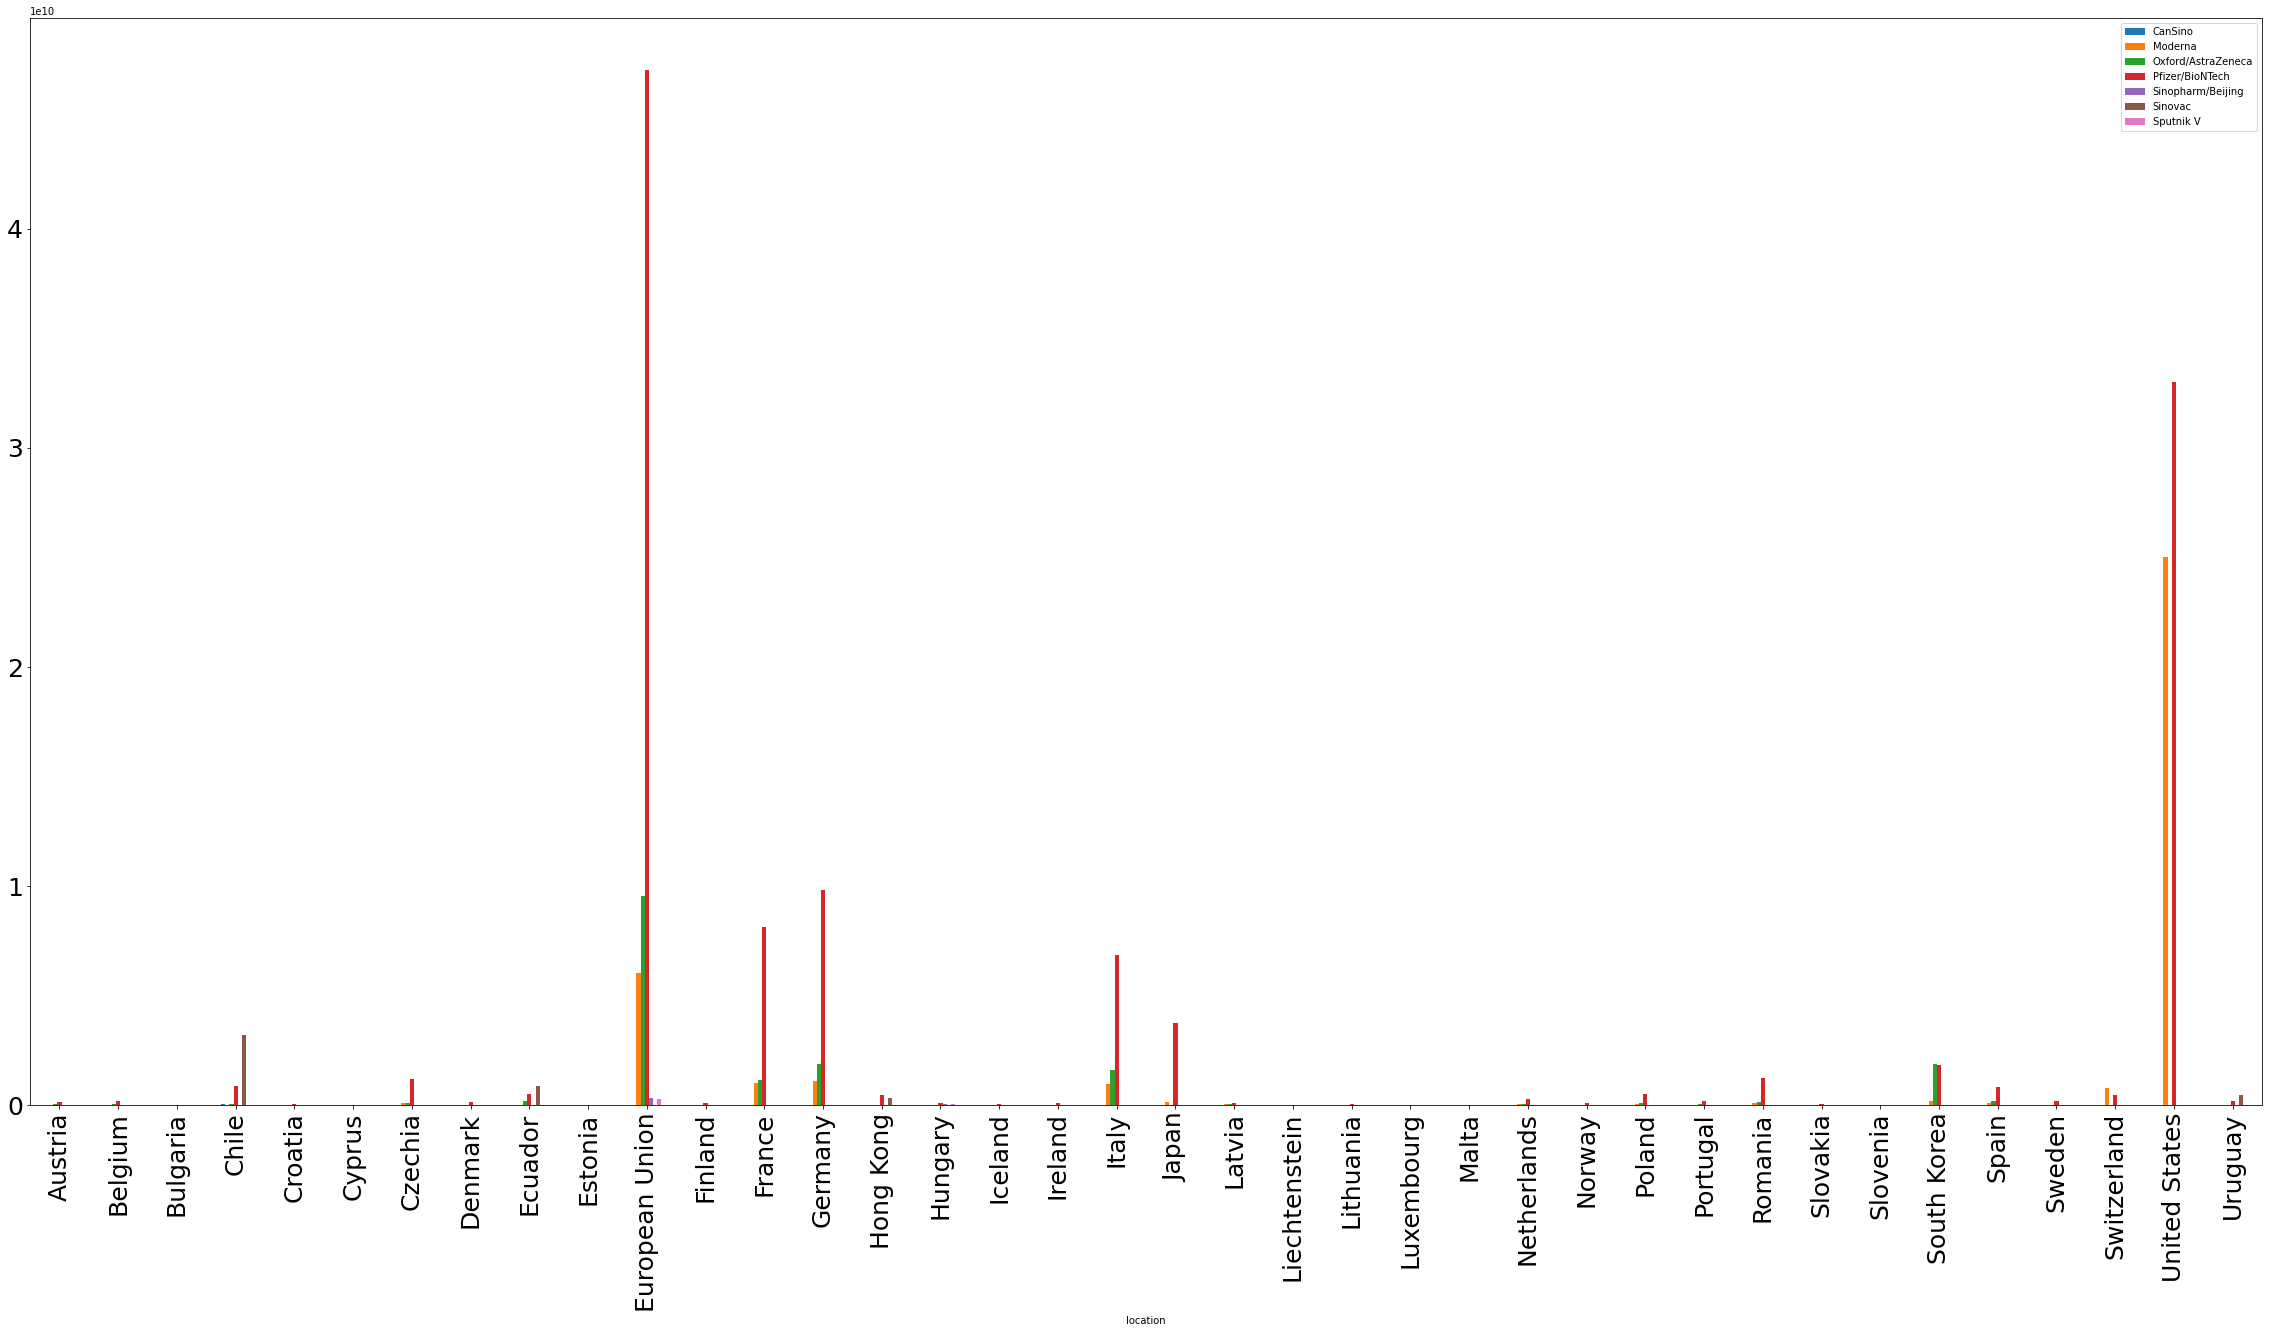

In [12]:

# plot.fig(figsize=(5,5)
# plot.subplot(1,2,1)
# sns.countplot('Johnson&Johnson',hue='location',data=manufacturer_df)
# plot.subplot(1,2,2)
# sns.countplot('Moderna',hue='location',data=manufacturer_df)
# plot.show()
# Plot of every vacci
loc = Vaccines_df.groupby('location')['CanSino', 'Moderna','Oxford/AstraZeneca', 'Pfizer/BioNTech','Sinopharm/Beijing','Sinovac','Sputnik V'].sum()
loc.plot(kind= 'bar', figsize = (40,20), fontsize = 25)


In [13]:
fig = px.histogram(Vaccines_df, x="location",y='Pfizer/BioNTech')
fig.show()

In [17]:
fig = px.histogram(Vaccines_df, x="location",y='Johnson&Johnson')
fig.show()

In [18]:
fig = px.histogram(Vaccines_df, x="location",y='Moderna')
fig.show()

In [20]:
fig = px.histogram(Vaccines_df, x="location",y='CanSino')
fig.show()

In [21]:
fig = px.histogram(Vaccines_df, x="location",y='Oxford/AstraZeneca')
fig.show()

In [22]:
fig = px.histogram(Vaccines_df, x="location",y='Sinopharm/Beijing')
fig.show()

In [23]:
fig = px.histogram(Vaccines_df, x="location",y='Sinovac')
fig.show()

In [24]:
fig = px.histogram(Vaccines_df, x="location",y='Sputnik V')
fig.show()

In [14]:
pop_df=pd.read_csv("../Resources/2021_population.csv")
pop_df.head()

iso_code        country 2021_last_updated 2020_population             area  \
0      CHN          China     1,445,558,229   1,439,323,776  9,706,961 sq_km   
1      IND          India     1,397,131,040   1,380,004,385  3,287,590 sq_km   
2      USA  United States       333,453,648     331,002,651  9,372,610 sq_km   
3      IDN      Indonesia       277,151,016     273,523,615  1,904,569 sq_km   
4      PAK       Pakistan       226,389,268     220,892,340    881,912 sq_km   

  density_sq_km growth_rate world_%  rank  
0     149/sq_km       0.34%  18.34%     1  
1     424/sq_km       0.97%  17.69%     2  
2      36/sq_km       0.58%   4.23%     3  
3     145/sq_km       1.04%   3.51%     4  
4     255/sq_km       1.95%   2.86%     5

In [15]:
#pop_df.rename(columns={'country': 'location'},inplace=True, errors='raise')

In [16]:
#pop_manu_df=pd.merge(Vaccines_df,pop_df,how="outer", on='country')

In [23]:
pathToTotal = os.path.join("..","Resources","country_vaccinations.csv")
total_vacc_df = pd.read_csv(pathToTotal)
total_vacc_df.head()

country iso_code        date  total_vaccinations  people_vaccinated  \
0  Afghanistan      AFG  2021-02-22                 0.0                0.0   
1  Afghanistan      AFG  2021-02-23                 NaN                NaN   
2  Afghanistan      AFG  2021-02-24                 NaN                NaN   
3  Afghanistan      AFG  2021-02-25                 NaN                NaN   
4  Afghanistan      AFG  2021-02-26                 NaN                NaN   

   people_fully_vaccinated  daily_vaccinations_raw  daily_vaccinations  \
0                      NaN                     NaN                 NaN   
1                      NaN                     NaN              1367.0   
2                      NaN                     NaN              1367.0   
3                      NaN                     NaN              1367.0   
4                      NaN                     NaN              1367.0   

   total_vaccinations_per_hundred  people_vaccinated_per_hundred  \
0                             0.0                            0.0   
1                             NaN                            NaN   
2                             NaN                            NaN   
3                             NaN                            NaN   
4                             NaN                            NaN   

   people_fully_vaccinated_per_hundred  daily_vaccinations_per_million  \
0                                  NaN                             NaN   
1                                  NaN                            34.0   
2                                  NaN                            34.0   
3                                  NaN                            34.0   
4                                  NaN                            34.0   

                                            vaccines  \
0  Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...   
1  Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...   
2  Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...   
3  Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...   
4  Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...   

                 source_name  \
0  World Health Organization   
1  World Health Organization   
2  World Health Organization   
3  World Health Organization   
4  World Health Organization   

                                      source_website  
0  https://app.powerbi.com/view?r=eyJrIjoiYTkyM2V...  
1  https://app.powerbi.com/view?r=eyJrIjoiYTkyM2V...  
2  https://app.powerbi.com/view?r=eyJrIjoiYTkyM2V...  
3  https://app.powerbi.com/view?r=eyJrIjoiYTkyM2V...  
4  https://app.powerbi.com/view?r=eyJrIjoiYTkyM2V...

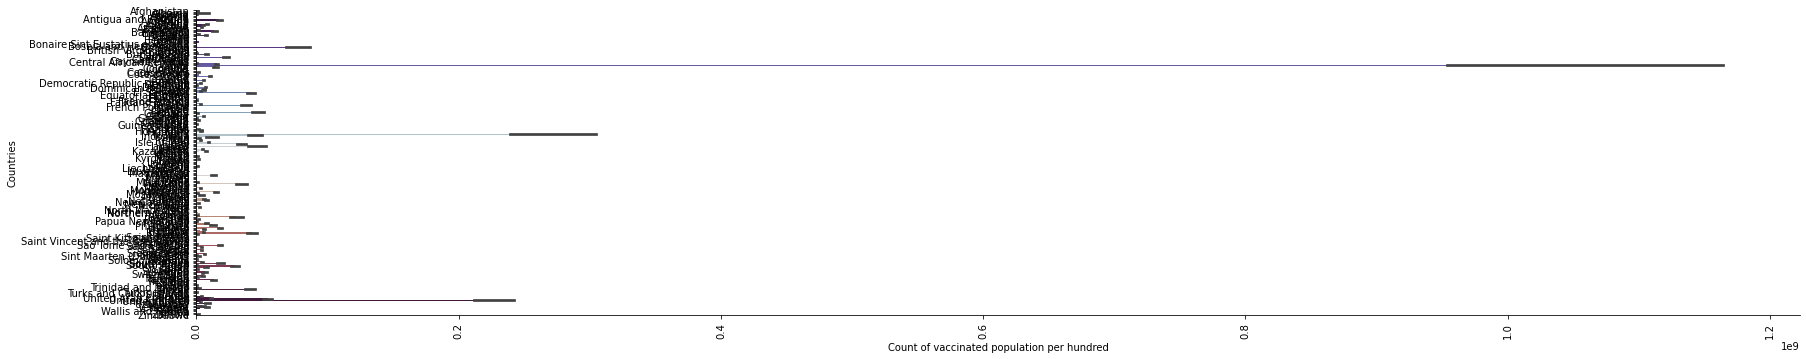

In [47]:
sns.catplot( x='total_vaccinations',  y=total_vacc_df.country ,data=total_vacc_df,kind='bar',palette='twilight_shifted', legend_out=False,aspect=5)
plt.xlabel('Count of vaccinated population per hundred')
plt.ylabel('Countries')
plt.xticks(rotation=90)
plt.show()